# **Using Transfer Learning and TensorFlow 2.0 to Classify Different Dog Breeds**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# # # Use the '-d' parameter as the destination for where the files should go
# !unzip "/content/drive/MyDrive/dog-breed.zip" -d "/content/drive/MyDrive/dog-data"

 ### **In this project we're going to be using machine learning to help us identify different breeds of dogs.**

### **To do this, we'll be using data from the Kaggle dog breed identification competition. It consists of a collection of 10,000+ labelled images of 120 different dog breeds.**


Since the most important step in a deep learng problem is getting the data ready (turning it into numbers), that's what we're going to start with.

We're going to go through the following TensorFlow/Deep Learning workflow:

->Get data ready (download from Kaggle, store, import).
Prepare the data (preprocessing, the 3 sets, X & y).

->Choose and fit/train a model (TensorFlow Hub, tf.keras.applications, TensorBoard, EarlyStopping).

->Evaluating a model (making predictions, comparing them with the ground truth labels).

->Improve the model through experimentation (start with 1000 images, make sure it works, increase the number of images).

->Save, sharing and reloading your model (once you're happy with the results).

In [ ]:
# At time of recording, TF 2.x is not the default
import tensorflow as tf
print("TF version:", tf.__version__)

TF version: 2.12.0


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)

# Check for GPU
print("GPU", "available " if tf.config.list_physical_devices("GPU") else "Not Available")

TF version: 2.12.0
Hub version: 0.13.0
GPU available 


In [ ]:
import pandas as pd
# from google.colab import data_table
# data_table.disable_dataframe_formatter()

labels = pd.read_csv("/content/drive/MyDrive/dog-data/labels.csv")
labels .head(10)

id               breed
0  000bec180eb18c7604dcecc8fe0dba07         boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97               dingo
2  001cdf01b096e06d78e9e5112d419397            pekinese
3  00214f311d5d2247d5dfe4fe24b2303d            bluetick
4  0021f9ceb3235effd7fcde7f7538ed62    golden_retriever
5  002211c81b498ef88e1b40b9abf84e1d  bedlington_terrier
6  00290d3e1fdd27226ba27a8ce248ce85  bedlington_terrier
7  002a283a315af96eaea0e28e7163b21b              borzoi
8  003df8b8a8b05244b1d920bb6cf451f9             basenji
9  0042188c895a2f14ef64a918ed9c7b64  scottish_deerhound

In [ ]:
labels.describe()

id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126

Thus there are 120 different breeds of dog among our 10000+ data of dogs

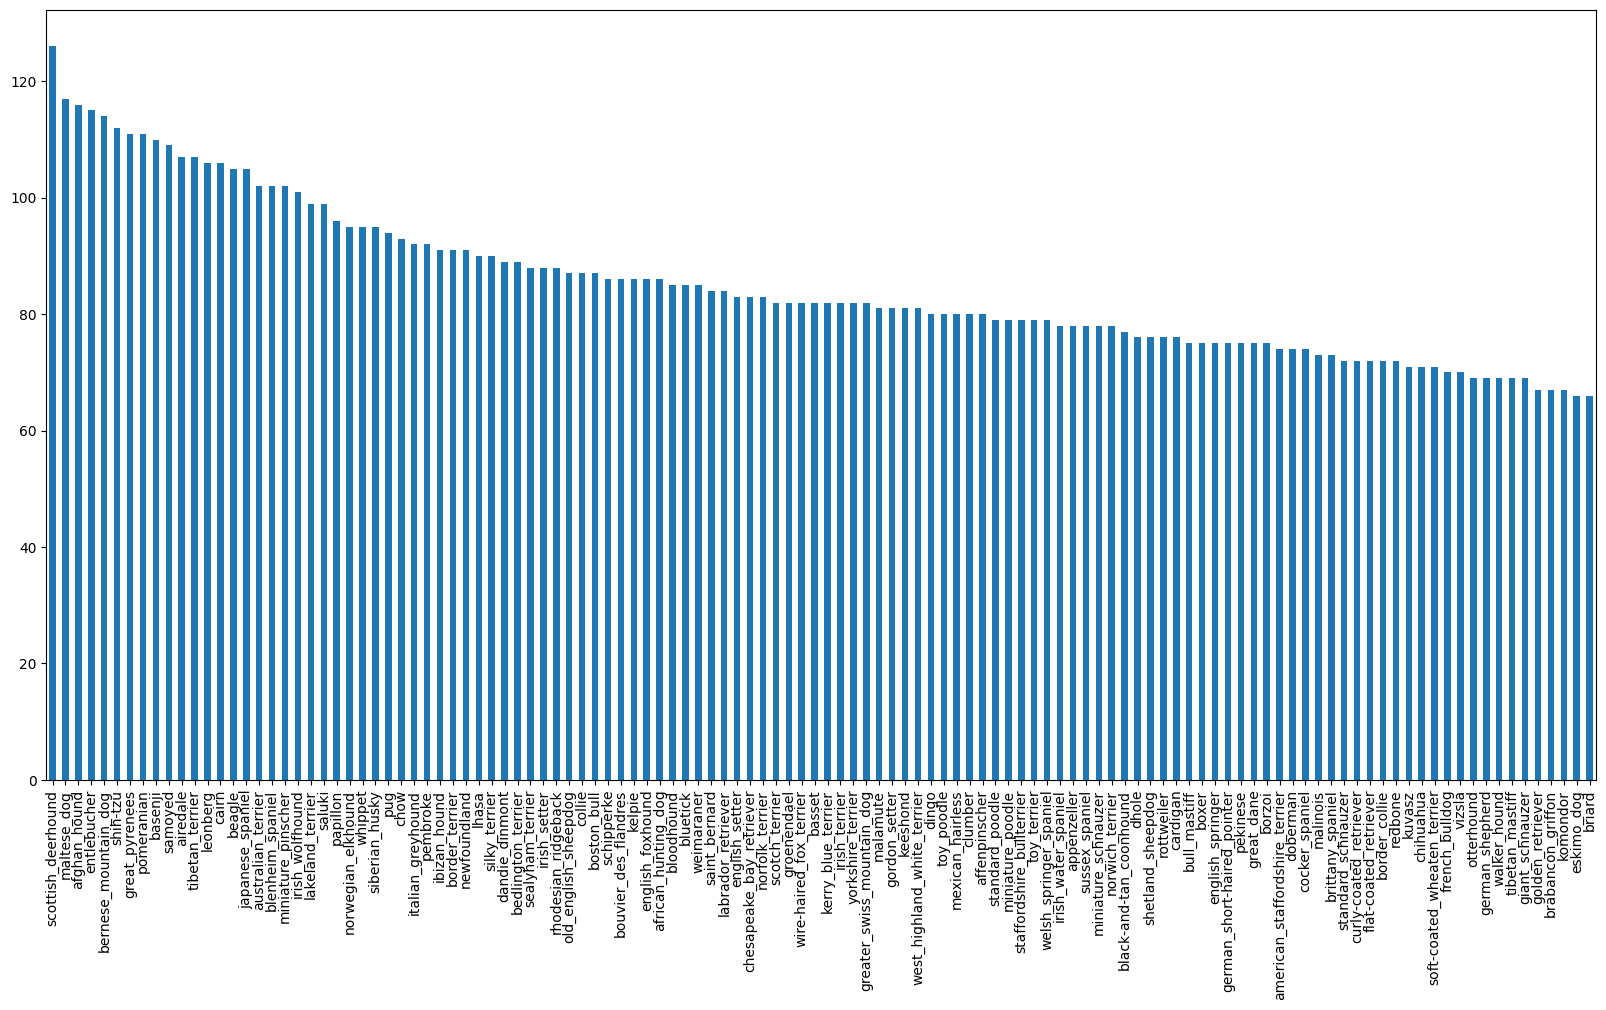

In [ ]:
# How many images are there of each breed?
labels["breed"].value_counts().plot.bar(figsize=(20, 10));

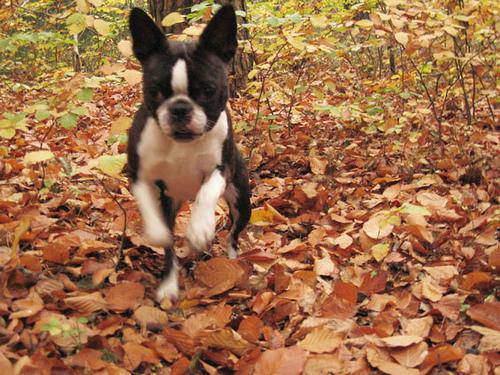

In [ ]:
from IPython.display import display, Image
Image("/content/drive/MyDrive/dog-data/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

In [ ]:
filenames = ["/content/drive/MyDrive/dog-data/train/" + fname + ".jpg" for fname in labels["id"]]

In [ ]:
filenames[:5]

['/content/drive/MyDrive/dog-data/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/dog-data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/dog-data/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/dog-data/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/dog-data/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

In [ ]:
# Check whether number of filenames matches number of actual image files
import os
if len(os.listdir("/content/drive/MyDrive/dog-data/train")) == len(filenames):
  print("Filenames match actual amount of files!")
else:
  print("Filenames do not match actual amount of files, check the target directory.")

Filenames match actual amount of files!


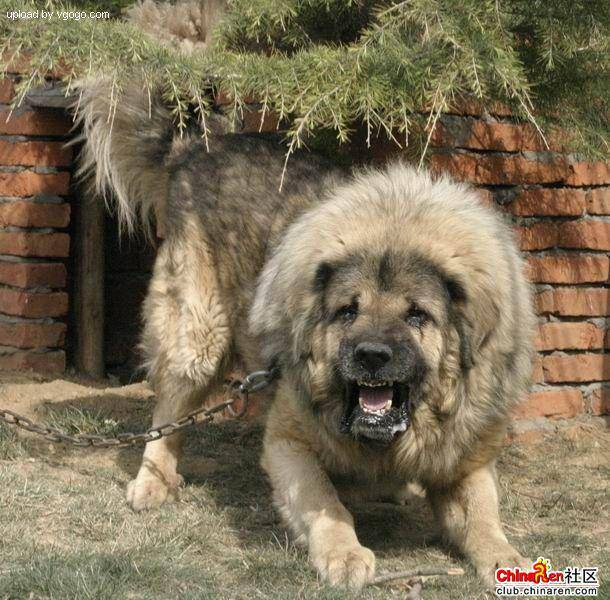

In [ ]:
# Check an image directly from a filepath
Image(filenames[9000])

In [ ]:
import numpy as np
labels = labels["breed"].to_numpy() # convert labels column to NumPy array
labels[:20]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji',
       'scottish_deerhound', 'shetland_sheepdog', 'walker_hound',
       'maltese_dog', 'bluetick', 'norfolk_terrier',
       'african_hunting_dog', 'wire-haired_fox_terrier', 'redbone',
       'lakeland_terrier', 'boxer'], dtype=object)

In [ ]:
# See if number of labels matches the number of filenames
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames!")
else:
  print("Number of labels does not match number of filenames, check data directories.")

Number of labels matches number of filenames!


In [ ]:
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [ ]:
# comparing the first record of breeds to unique breeds to get a booloean array
print(labels[10])
labels[10] == unique_breeds

shetland_sheepdog


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# Turn every label into a boolean array
boolean_labels = [label == np.array(unique_breeds) for label in labels]
boolean_labels[:3]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
# Example: Turning a boolean array into integers
print(labels[10]) # original label
print(np.where(unique_breeds == labels[10])[0][0]) # index where label occurs
print(boolean_labels[10].argmax()) # index where label occurs in boolean array
print(boolean_labels[10].astype(int)) # there will be a 1 where the sample label occurs

shetland_sheepdog
99
99
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


Validation set creation, since the given dataset does not contain validation set.

In [ ]:
# Setup X & y variables
X = filenames
y = boolean_labels

Working with first two thousand images

In [ ]:
# Import train_test_split from Scikit-Learn
from sklearn.model_selection import train_test_split

# Split them into training and validation using NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:2000],
                                                  y[:2000],
                                                  test_size=0.2,
                                                  random_state=1)

len(X_train), len(y_train), len(X_val), len(y_val)

(1600, 1600, 400, 400)

To preprocess our images into Tensors we're going to write a function which

1.Takes an image filename as input.

2.Uses TensorFlow to read the file and save it to a variable, image.

3.Turn our image (a jpeg file) into Tensors.

4.Resize the image to be of shape (224, 224).

5.Return the modified image.

In [ ]:
# Define image size
IMG_SIZE = 224

def process_image(image_path):
  """
  Takes an image file path and turns it into a Tensor.
  """
  # Read in image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-225 values to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired size (224, 244)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image

In [ ]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [ ]:
# Define the batch size, 32 is a good default
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data if a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    # If the data is a training dataset, we shuffle it
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels

    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch


In [ ]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [ ]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [ ]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays 25 images from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn gird lines off
    plt.axis("off")

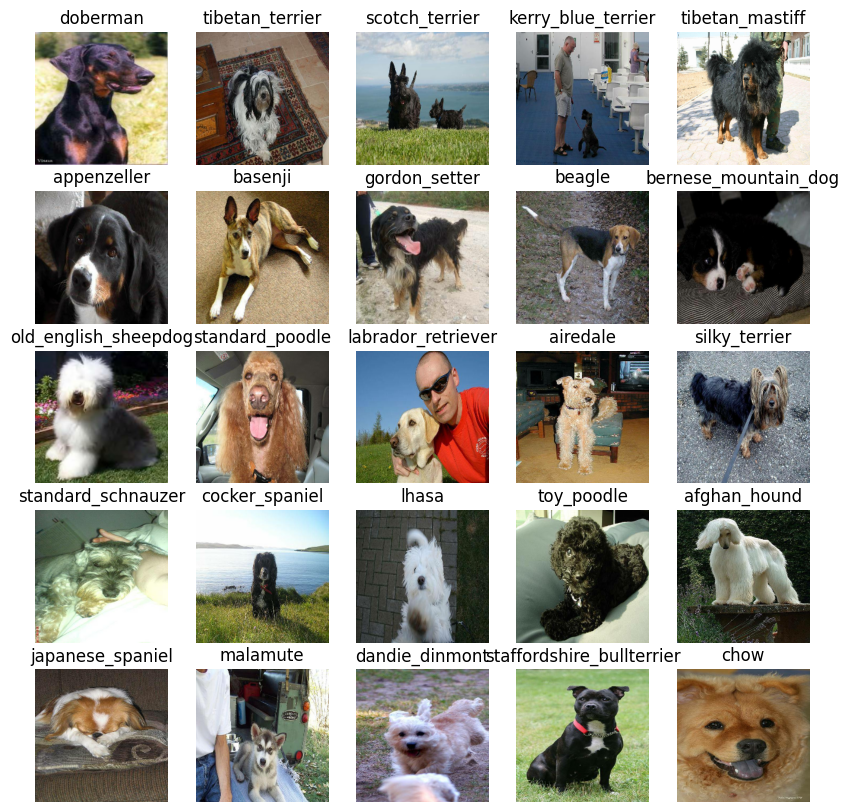

In [ ]:
# Visualize training images from the training data batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

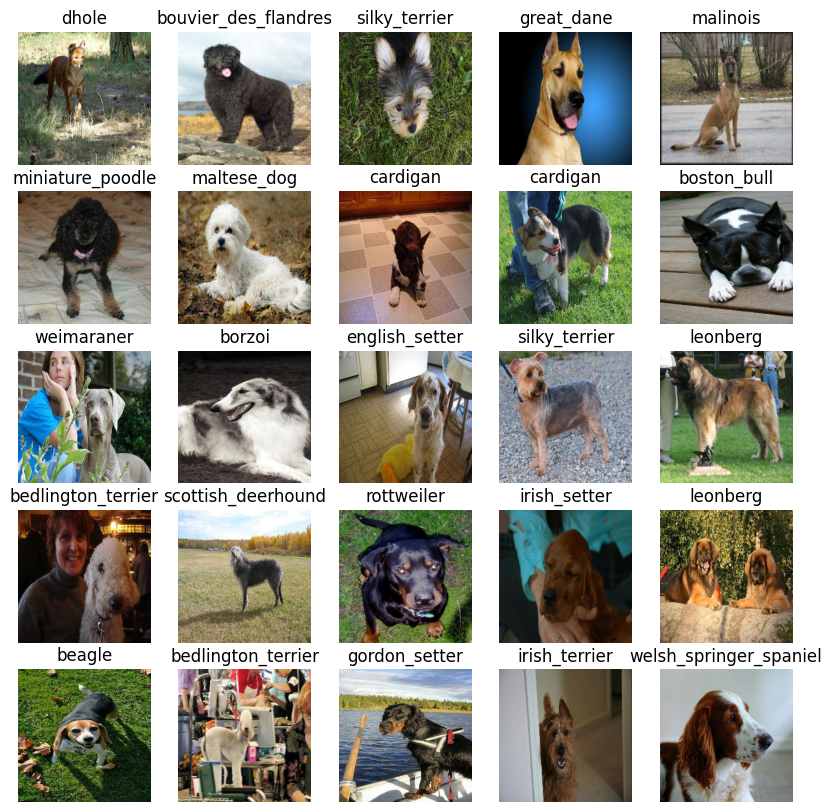

In [ ]:
# Visualize validation images from the validation data batch
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

In [ ]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_breeds) # number of unique labels

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [ ]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), # Our model wants to reduce this (how wrong its guesses are)
      optimizer=tf.keras.optimizers.Adam(), # A friend telling our model how to improve its guesses
      metrics=["accuracy"] # We'd like this to go up
  )

  # Build the model
  model.build(INPUT_SHAPE) # Let the model know what kind of inputs it'll be getting

  return model

In [ ]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), # Our model wants to reduce this (how wrong its guesses are)
      optimizer=tf.keras.optimizers.Adam(), # A friend telling our model how to improve its guesses
      metrics=["accuracy"] # We'd like this to go up
  )

  # Build the model
  model.build(INPUT_SHAPE) # Let the model know what kind of inputs it'll be getting

  return model

In [ ]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("/content/drive/MyDrive/dog-data",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [ ]:
# Create early stopping (once our model stops improving, stop training)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3) # stops after 3 rounds of no improvements

In [ ]:
# Check again if GPU is available (otherwise computing will take a looooonnnnggggg time)
print("GPU", "available" if tf.config.list_physical_devices("GPU") else "not available")

GPU available


In [ ]:
# Number of rounds we get the model to look through the data?
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

In [ ]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1, # check validation metrics every epoch
            callbacks=[tensorboard, early_stopping])

  return model

In [ ]:
# Fit the model to the data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
50/50 [==============================] - 251s 5s/step - loss: 3.5825 - accuracy: 0.2362 - val_loss: 1.9467 - val_accuracy: 0.5475
Epoch 2/100
50/50 [==============================] - 6s 118ms/step - loss: 0.8213 - accuracy: 0.8381 - val_loss: 1.1839 - val_accuracy: 0.6875
Epoch 3/100
50/50 [==============================] - 8s 165ms/step - loss: 0.3224 - accuracy: 0.9556 - val_loss: 1.0347 - val_accuracy: 0.7000
Epoch 4/100
50/50 [==============================] - 6s 113ms/step - loss: 0.1749 - accuracy: 0.9894 - val_loss: 0.9781 - val_accuracy: 0.7100
Epoch 5/100
50/50 [==============================] - 7s 144ms/step - loss: 0.1114 - accuracy: 0.9969 - val_loss: 0.9390 - val_accuracy: 0.7125
Epoch 6/100
50/50 [==============================] - 6s 117ms/step - loss: 0.0797 - accuracy: 0.9987 - val_loss: 0.9048 - val_accuracy: 0.7275
Epoch 7/100
50/50 [==============================]

In [ ]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1) # verbose shows us how long there is to go
predictions

13/13 [==============================] - 5s 90ms/step


array([[1.59341202e-04, 1.48554700e-05, 1.13047927e-03, ...,
        2.61862035e-04, 1.63721765e-04, 1.47467043e-04],
       [1.29019118e-05, 5.25385141e-04, 3.71583354e-07, ...,
        1.15189619e-06, 4.61837402e-07, 4.41275859e-07],
       [4.89467639e-04, 3.60991726e-05, 9.63035796e-04, ...,
        1.57006218e-06, 4.07963467e-04, 4.92441326e-01],
       ...,
       [1.70318444e-07, 8.34887928e-08, 8.08644529e-07, ...,
        2.07311314e-06, 7.55695524e-08, 3.67449902e-05],
       [6.90552133e-06, 1.25580918e-04, 6.00710118e-05, ...,
        1.37323470e-04, 1.01207465e-01, 1.78092776e-03],
       [1.62185665e-04, 1.51625442e-04, 1.78173330e-04, ...,
        2.30574205e-05, 1.46747325e-05, 1.45479717e-05]], dtype=float32)

In [ ]:
# Check the shape of predictions
predictions.shape

(400, 120)

In [ ]:
# First prediction
print(predictions[0])
print(f"Max value (probability of prediction): {np.max(predictions[0])}") # the max probability value predicted by the model
print(f"Sum: {np.sum(predictions[0])}") # because we used softmax activation in our model, this will be close to 1
print(f"Max index: {np.argmax(predictions[0])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label: {unique_breeds[np.argmax(predictions[0])]}") # the predicted label

[1.59341202e-04 1.48554700e-05 1.13047927e-03 6.49174690e-05
 9.09626488e-06 7.47875951e-04 9.20379185e-04 1.85253040e-04
 9.90906483e-05 3.68106921e-05 6.33105401e-06 6.00948697e-05
 1.06352090e-05 2.12825835e-05 6.16649486e-05 2.58898508e-04
 4.44406987e-06 3.08275776e-04 1.17195959e-04 9.56737676e-06
 8.55088092e-06 2.17300130e-05 4.57257032e-04 1.90542014e-05
 2.89247895e-04 1.27907133e-05 2.43593649e-06 3.48988746e-04
 3.31879652e-04 5.47241536e-04 6.17135724e-04 1.02860940e-06
 6.28169873e-05 6.51403534e-05 1.78455550e-04 3.63334266e-07
 7.65392065e-01 3.33381705e-02 2.05949502e-04 3.97890399e-04
 3.03708771e-06 2.93310995e-06 1.42922465e-04 3.45684268e-04
 1.85571495e-04 8.26466057e-05 2.68510455e-04 6.33370219e-05
 1.72909549e-05 2.14216243e-02 1.52528795e-04 2.44873445e-05
 1.16035117e-04 3.29418035e-05 4.59034403e-04 1.58685725e-03
 5.12725674e-02 4.39730356e-04 5.80402811e-05 1.59081028e-05
 2.26575903e-05 3.11381475e-04 6.77673324e-06 9.81969982e-02
 9.36177003e-06 1.301648

In [ ]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[0])
pred_label

'dhole'

In [ ]:
# Create a function to unbatch a batched dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.7718949 , 0.7679733 , 0.54444385],
         [0.7983484 , 0.7983484 , 0.5586439 ],
         [0.77953327, 0.7873764 , 0.5324744 ],
         ...,
         [0.4266798 , 0.57548696, 0.39127946],
         [0.42250055, 0.5585649 , 0.3462049 ],
         [0.3238966 , 0.45330837, 0.23762208]],
 
        [[0.8073341 , 0.8112557 , 0.58380467],
         [0.7764743 , 0.78039587, 0.545115  ],
         [0.75528526, 0.76249814, 0.51576144],
         ...,
         [0.34726572, 0.49557465, 0.31161627],
         [0.39825654, 0.5225562 , 0.3252872 ],
         [0.39826703, 0.51591414, 0.3119925 ]],
 
        [[0.7725765 , 0.7835283 , 0.5554534 ],
         [0.7807248 , 0.7846464 , 0.5551016 ],
         [0.84379953, 0.84563774, 0.60758626],
         ...,
         [0.3788427 , 0.5200192 , 0.339627  ],
         [0.361238  , 0.47788364, 0.28639722],
         [0.4291768 , 0.5414492 , 0.34558958]],
 
        ...,
 
        [[0.20962963, 0.26061004, 0.18217865],
         [0.20829691, 0.25927728, 0.18084

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=6):
  """
  View the prediction, ground truth label and image for sample n.
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)

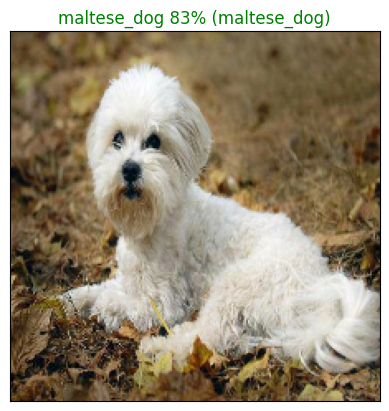

In [ ]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images)

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

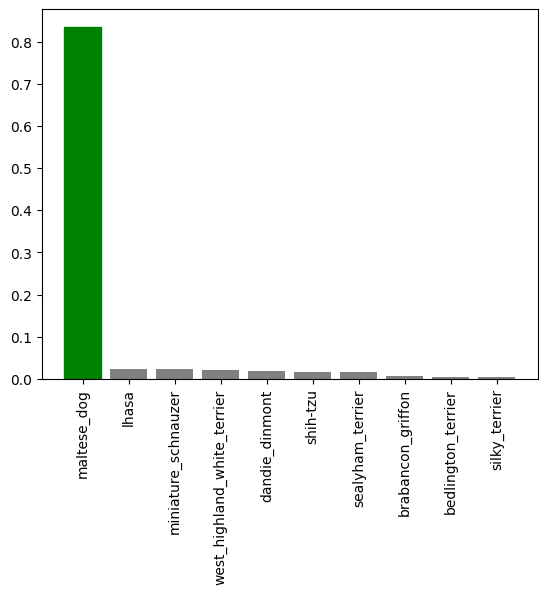

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=6)

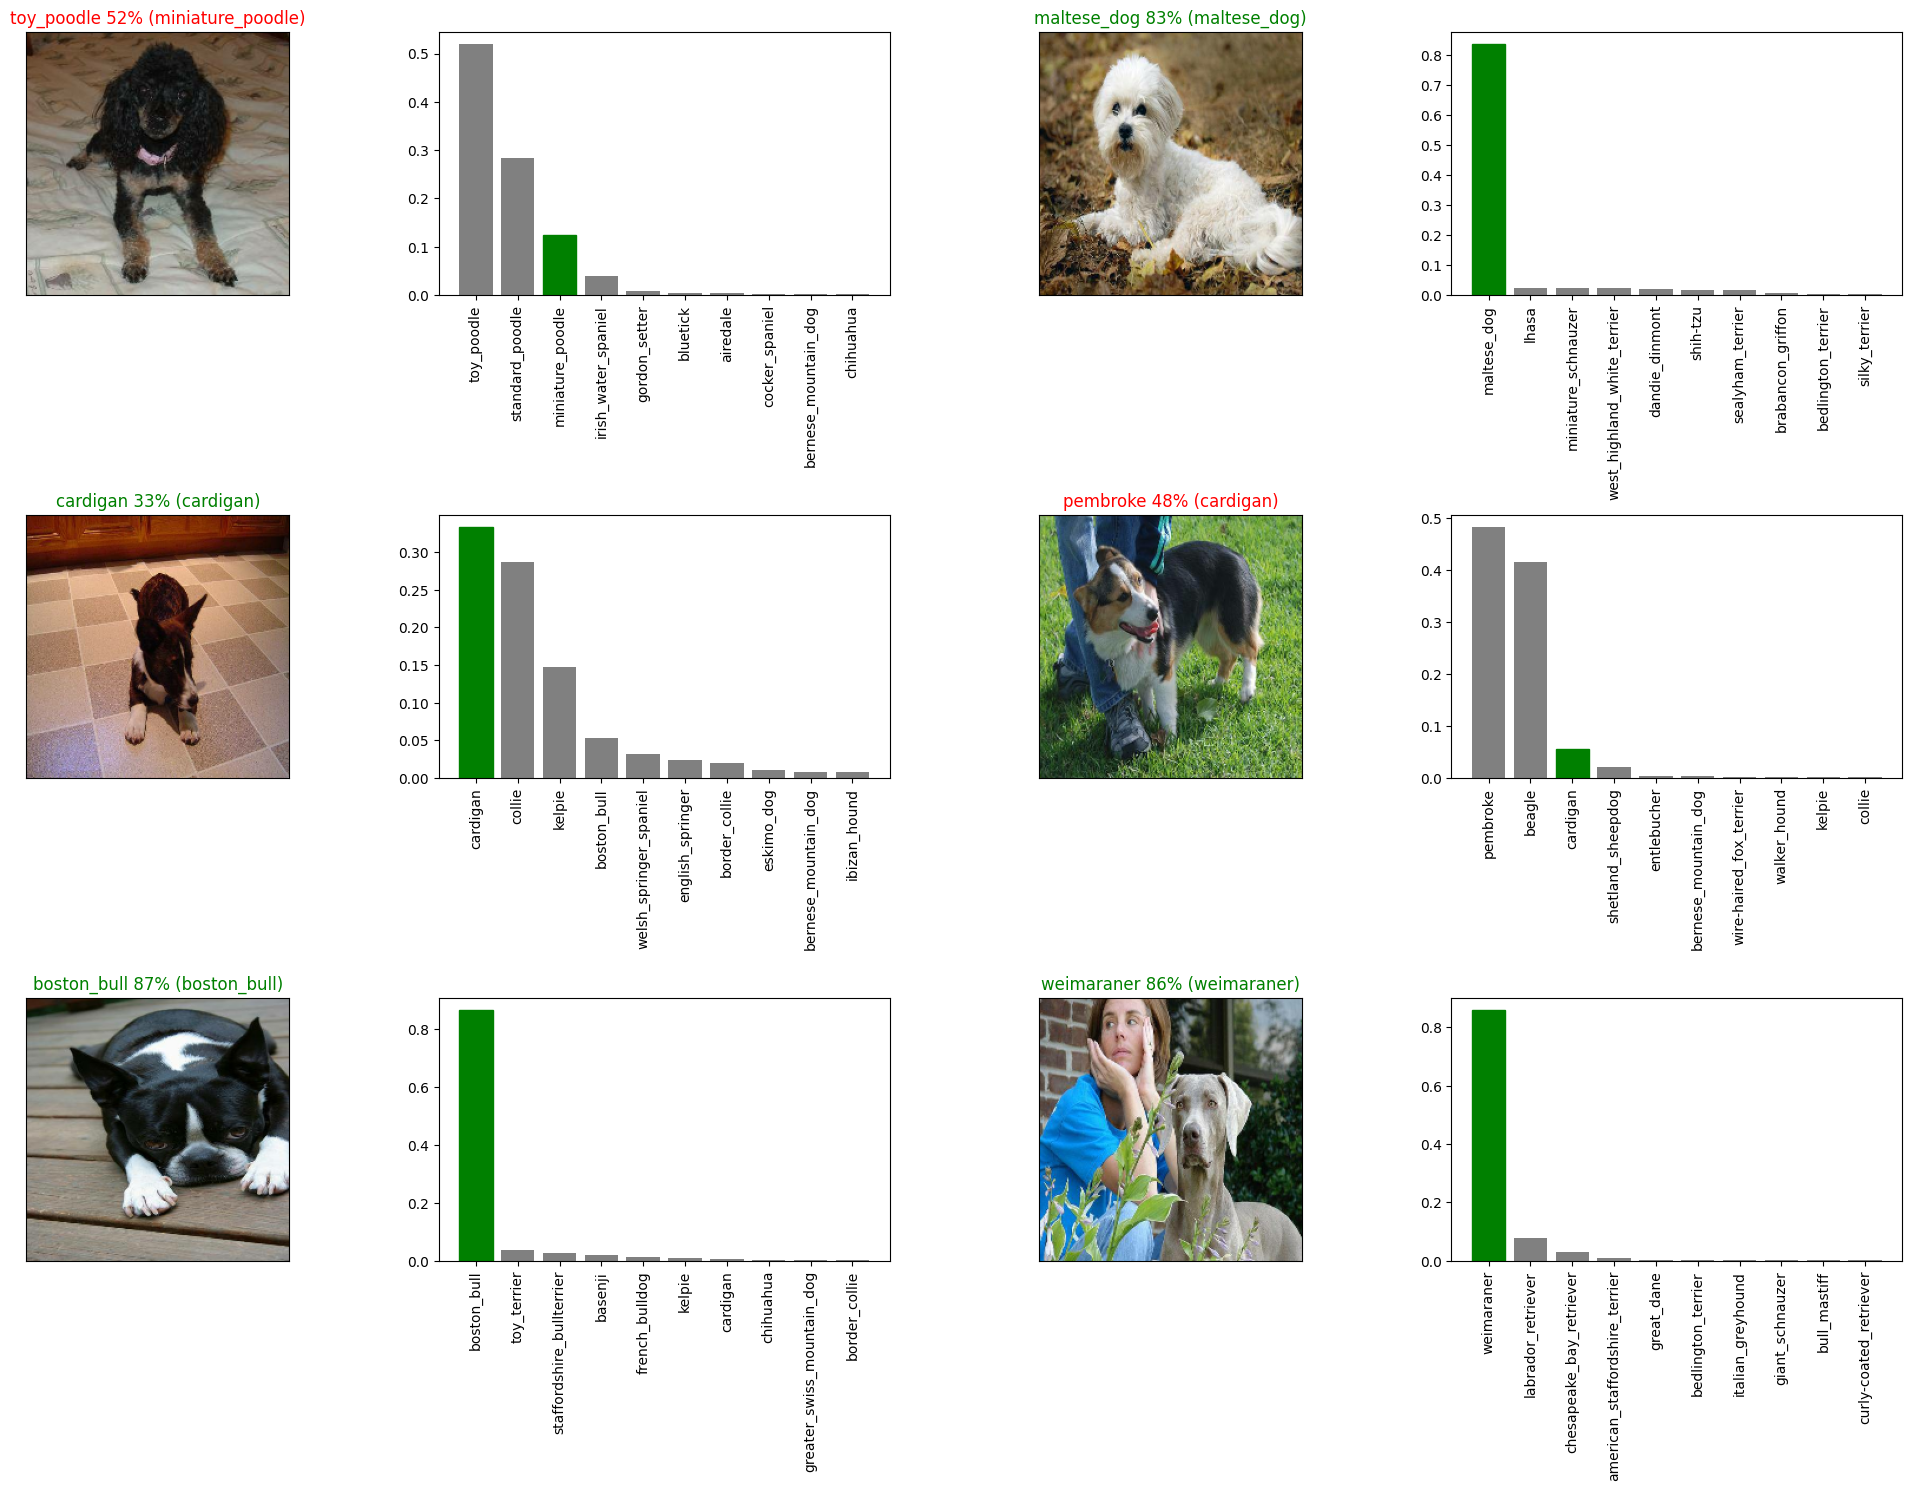

In [ ]:
# Let's check a few predictions and their different values
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+5)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+5)
plt.tight_layout(h_pad=1.0)
plt.show()

In [ ]:
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (str)
  for clarity and reuse.
  """
  # Create model directory with current time
  modeldir = os.path.join("/content/drive/MyDrive/dog-data/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [ ]:
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
# Save our model trained on 1000 images
save_model(model, suffix="trained-with-2000-images")

Saving model to: /content/drive/MyDrive/dog-data/models/20230606-06331686033205-trained-with-2000-images.h5...


'/content/drive/MyDrive/dog-data/models/20230606-06331686033205-trained-with-2000-images.h5'

In [ ]:
model_2000_images = load_model('/content/drive/MyDrive/dog-data/models/20230606-06331686033205-trained-with-2000-images.h5')

Loading saved model from: /content/drive/MyDrive/dog-data/models/20230606-06331686033205-trained-with-2000-images.h5


In [ ]:
# Evaluate the pre-saved model
model.evaluate(val_data),model_2000_images.evaluate(val_data)

13/13 [==============================] - 3s 89ms/step - loss: 0.8597 - accuracy: 0.7425


([0.8596813678741455, 0.7425000071525574],
 [0.8596813678741455, 0.7425000071525574])

Training on full data

In [ ]:
full_data = create_data_batches(X, y)

Creating training data batches...


In [ ]:
# Instantiate a new model for training on the full dataset
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [ ]:
# Early stopping callback
# Note: No validation set when training on all the data, therefore can't monitor validation accruacy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [ ]:
# Early stopping callback
# Note: No validation set when training on all the data, therefore can't monitor validation accruacy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [ ]:
# Fit the full model to the full training data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[
                          full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 37s 103ms/step - loss: 1.3454 - accuracy: 0.6646
Epoch 2/100
320/320 [==============================] - 36s 111ms/step - loss: 0.4011 - accuracy: 0.8809
Epoch 3/100
320/320 [==============================] - 33s 103ms/step - loss: 0.2367 - accuracy: 0.9345
Epoch 4/100
320/320 [==============================] - 32s 100ms/step - loss: 0.1543 - accuracy: 0.9617
Epoch 5/100
320/320 [==============================] - 33s 104ms/step - loss: 0.1061 - accuracy: 0.9793
Epoch 6/100
320/320 [==============================] - 35s 109ms/step - loss: 0.0779 - accuracy: 0.9863
Epoch 7/100
320/320 [==============================] - 32s 100ms/step - loss: 0.0590 - accuracy: 0.9912
Epoch 8/100
320/320 [==============================] - 33s 102ms/step - loss: 0.0467 - accuracy: 0.9943
Epoch 9/100
320/320 [==============================] - 32s 101ms/step - loss: 0.0363 - accuracy: 0.9966
Epoch 10/100
320/320 [==============================] - 33s 102m

In [ ]:
save_model(full_model, suffix="all-images-Adam")

Saving model to: /content/drive/MyDrive/dog-data/models/20230606-07081686035327-all-images-Adam.h5...


'/content/drive/MyDrive/dog-data/models/20230606-07081686035327-all-images-Adam.h5'

In [ ]:
loaded_full_model = load_model('/content/drive/MyDrive/dog-data/models/20230606-07081686035327-all-images-Adam.h5')

Loading saved model from: /content/drive/MyDrive/dog-data/models/20230606-07081686035327-all-images-Adam.h5


In [ ]:
test_path = "/content/drive/MyDrive/dog-data/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]

test_filenames[:5]

['/content/drive/MyDrive/dog-data/test/e55534e27f92b4c8177ed2beb1cbba7b.jpg',
 '/content/drive/MyDrive/dog-data/test/e4607de37fdda1509487e042b6ca309a.jpg',
 '/content/drive/MyDrive/dog-data/test/e610bd621c660546f7cd1cd6554a5caf.jpg',
 '/content/drive/MyDrive/dog-data/test/ddf4f1d39b7ebc610ff479396cd9c6fc.jpg',
 '/content/drive/MyDrive/dog-data/test/e18fbb12037c297b90642e99073cd6b4.jpg']

In [ ]:
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


In [ ]:
test_prediction = loaded_full_model.predict(test_data,verbose = 1)

324/324 [==============================] - 235s 687ms/step


In [ ]:
test_prediction[:10]

array([[1.5344755e-09, 8.0582394e-09, 1.4587620e-10, ..., 2.5749133e-10,
        1.0095632e-06, 1.1665379e-06],
       [6.8065012e-11, 6.2624983e-10, 1.1652022e-10, ..., 5.0975210e-08,
        7.5360257e-10, 2.8183688e-08],
       [1.7762927e-11, 6.5209163e-09, 1.1949372e-11, ..., 1.0056044e-08,
        2.9925284e-09, 6.2292099e-10],
       ...,
       [1.9721400e-10, 6.3955889e-09, 2.8217451e-10, ..., 1.3643594e-05,
        9.4940962e-09, 5.0312234e-11],
       [2.6027141e-07, 1.6220851e-11, 1.5303674e-07, ..., 9.6811582e-06,
        1.1007540e-07, 7.0886199e-09],
       [9.9989772e-01, 1.3549431e-11, 6.1444003e-11, ..., 1.4574293e-10,
        1.5790146e-08, 2.8282981e-08]], dtype=float32)